In [2]:
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv('balance-scale.data.txt')
data.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [4]:
data['B'].value_counts()

R    288
L    288
B     48
Name: B, dtype: int64

In [5]:
data['B']=data['B'].map({'R':0,'L':1,'B':2})
data.head()

,B,1,1.1,1.2,1.3
0,0,1,1,1,2
1,0,1,1,1,3
2,0,1,1,1,4
3,0,1,1,1,5
4,0,1,1,2,1


In [6]:
X=data.drop(['B'],axis=1)[0:50]
X.head()

,1,1.1,1.2,1.3
0,1,1,1,2
1,1,1,1,3
2,1,1,1,4
3,1,1,1,5
4,1,1,2,1


In [7]:
y=data['B'][0:50]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: B, dtype: int64

In [8]:
data.shape

(624, 5)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

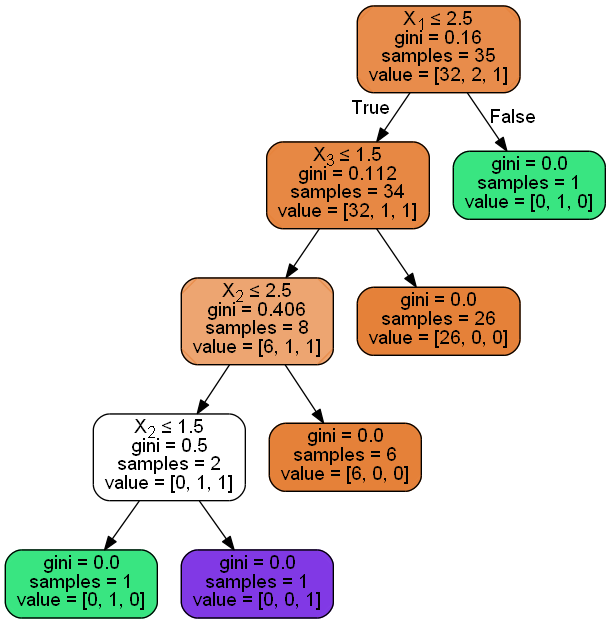

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())